## Assignment03
## MNIST DATA
## [K-means clustering]


# Name: YangMyungCheol(양명철)
# ID: 20122776
# Submission Time: 2019.04.04. 09:25am

-------------------------------------------------------------------------------------------------------------------------------------------
## [K-means clustering]

### [1. Apply K-means clustering to MNIST training dataset with different K = 5, 10, 15, 20 and present the following results for each K.
### [2. Visualize K centroid images for each category.
### [3. Plot the training energy per optimization iteration.
### [4. Plot the training accuracy per optimization iteration.
### [5. Plot the testing accuracy per optimization iteration.


### - (training energy) is computed on the training dataset.
### - (training accuracy) is computed on the training dataset.
### - (testing accuracy) is computed on the testing dataset.


In [69]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 

# Read the Data and Data Processing
## - training data set

In [91]:
file_data   = "./mnist_train.csv" 
handle_file = open(file_data, "r") 
data        = handle_file.readlines() 
handle_file.close() 

size_row    = 28    # height of the image 
size_col    = 28    # width of the image 

#num_image   = len(data) # original data length 
num_image   = 2000
count       = 0     # count for the number of images


# Normalization function

In [71]:
print(num_image)

2000


In [78]:
#
# normalize the values of the input data to be [0, 1]
#
def normalize(data):

    data_normalized = (data - min(data)) / (max(data) - min(data))

    return(data_normalized)


# Image vectors and label list

In [92]:
#
# make a matrix each column of which represents an images in a vector form 
# 
list_image  = np.empty((size_row * size_col, num_image), dtype=float) # represents each image in ve ctor form 
list_label  = np.empty(num_image, dtype=int) #for line in data: # original loop 

for line in data[:2000]:    
    
    line_data   = line.split(',')    
    label       = line_data[0]    
    im_vector   = np.asfarray(line_data[1:])    
    im_vector   = normalize(im_vector)    
    
    list_label[count]       = label    
    list_image[:, count]    = im_vector        
    
    count += 1

In [93]:
im_vector   = np.asfarray(line_data[1:])    
im_vector(print)

TypeError: 'numpy.ndarray' object is not callable

In [37]:
print(data[0][2])

0


In [30]:
print(im_vector[0])

0.0


In [24]:
list_label[59999]

8

In [9]:
list_image.shape

(784, 60000)

In [18]:
print(list_image[0])

[0. 0. 0. ... 0. 0. 0.]


In [5]:
img_char = list_image.shape[0] # the number of row of list_image vector: 784 
cnum = list_image.shape[1] # the number of column number of list_image vector: 10000

# Initialise Label Function

In [6]:
 def initialiseLabel(num_image, k):    
        labels = []     
        for i in range(num_image):        
            labels.append(np.random.choice(range(k)))    
        return labels


# Compute Centroid Function

In [7]:
 def computeCentroid(list_image, labels, k):    
        centroids = []        
        
        for label in range(k):        
            label_data = [] # contains info of each columns               
            
            # dh: iterate each row which represents each cell of an image        
            for ic in range(img_char):            
                # contains info of each each list_image's treat in icth row            
                label_data_array = []                        
                
                for i in range(num_image):                
                    if labels[i] == label: # check if img's label matches with k                    
                        label_data_array.append(list_image[ic][i])                                
                label_data.append(label_data_array)                    
            
            means = [] # contains info of each columns' mean at each label                
            
            for m in range(img_char):            
                means.append(np.mean(label_data[m]))               
                
            centroids.append(means)           
        return centroids

# Distance function

In [8]:
def distance(d):    
    
    s = np.sum(d)    
    r = np.sqrt(s)    
    
    return(r)


# Distanec between each image and each centroid

In [9]:
 def distanceToCentroids(list_image, centroids):    
        # distances contains all distance info    
        distances = []    
        for centroid in centroids:
            distance_k = []        
            for i in range(num_image):            
                distance_img = []            
                for ic in range(img_char):                
                    distance_cent = (list_image[ic][i] - centroid[ic])**2                
                    distance_img.append(distance_cent)            
                d = distance(distance_img)            
                distance_k.append(d)        
            distances.append(distance_k)    
        return distances


# Assign Label function which cluster data into the closest centroid group

In [10]:
 def assignLabel(distances):    
        # compute the closest centroid labels using pandas    
        df = pd.DataFrame(np.array(distances).reshape(k, num_image)) # for debugging    
        closest_cent = pd.DataFrame(df.idxmin()).values    
        new_labels = np.concatenate(closest_cent)    
        return new_labels


# Compute Engery function

In [11]:
 def computeEnergy(distances, labels):    
        J = 0    
        N = num_image    
        for i in range(N):        
            # distance has info distances between ith data and each centroid        
            img_label = labels[i]        
            # find the data label's centroid distance        
            distance_k = distances[img_label][i]        
            J = J + distance_k ** 2     
        J = J / N    
        return J 

# compute accuracy function

In [12]:
 def clusteredResult(k, labels):    
        clustered_result = []    
        for k in range(k):        
            clustered_k = []        
            for i in range(len(labels)):            
                if labels[i] == k:                
                    clustered_k.append(list_label[i])        
            clustered_result.append(clustered_k)    
        return clustered_result 
    
def findFrequentLabel(k, clustered_result):    
    frequent_labels = []    
    for k in range(k):        
        frequent_label = np.bincount(clustered_result[k]).argmax()        
        frequent_labels.append(frequent_label)    
    return frequent_labels 

def computeAccuracy(k, clustered_result, frequent_labels):    
    accuracies = []    
    frequency_num = 0    
    for i in range(k):        
        fl = frequent_labels[i]        
        cr = clustered_result[i]        
        frequency_num += cr.count(fl)    
    accuracy = frequency_num/num_image    
    return accuracy


# Keep clustering until convergin

In [13]:
def cluster(k, list_image, init_labels):    
    energies = [ ]    
    accuracies = [ ]    
    # Until centroids do not change,    
    # repeat computing new centroids and assigning new labels to the points with the centroids    
    prev_centroids = computeCentroid(list_image, init_labels, k)    
    prev_distances = distanceToCentroids(list_image, prev_centroids)    
    prev_labels = assignLabel(prev_distances)    
    while True:        
        new_centroids = computeCentroid(list_image, prev_labels, k)        
        distances = distanceToCentroids(list_image, new_centroids)        
        new_labels = assignLabel(distances)        
        
        # When centroids do not change any more, break this loop        
        if prev_centroids == new_centroids:        
            break                    
            
        prev_centroids = new_centroids        
        prev_labels = new_labels                
        
        # Compute energy         
        energy = computeEnergy(distances, new_labels)        
        energies.append(energy)                
        
        # Compute accuracy        
        clustered_result = clusteredResult(k, new_labels)        
        frequent_labels = findFrequentLabel(k, clustered_result)        
        accuracy = computeAccuracy(k, clustered_result, frequent_labels)        
        accuracies.append(accuracy)                        
        
        result = {'energies': energies,                  
                  'accuracies': accuracies,                  
                  'prev_centroids': prev_centroids,                 
                  'prev_labels': prev_labels,                 
                  'frequent_labels': frequent_labels}    
    return result


# plot images and graph function

In [14]:
 def plotCentroids(k, centroids, labels):    
        centroids_np = np.array(centroids).reshape(k, 784)        
        
        for i in range(k):        
            plt.subplot(1, k, i+1)        
            if centroids == init_centroids:            
                plt.title(i)        
            else:            
                plt.title(labels[i])        
            plt.imshow(centroids_np[i].reshape((size_row, size_col)), cmap='Greys', interpolation='None')        
            
            frame   = plt.gca()        
            frame.axes.get_xaxis().set_visible(False)        
            frame.axes.get_yaxis().set_visible(False)        
            
        if centroids == init_centroids:        
            print(f"Initial Centroids with K={k}")    
        else:        
            print(f"Final Centroids with K={k}")    
        plt.show()

In [15]:
 def plotEnergies(energies):    
        plt.plot(energies, color = 'b', marker='o', label='ENERGY')    
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)    
        plt.show()


In [16]:
 def plotAccuracies(accuracies):    
        plt.plot(accuracies, color = 'r', marker='o', label='ACCURACY')    
        plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)    
        plt.show() 

# Execution K-means algorithm

------------------------------------------------------------
K = 5:
Initial Centroids with K=5


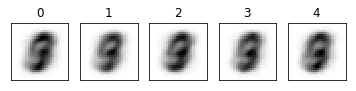

Final Centroids with K=5


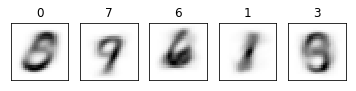

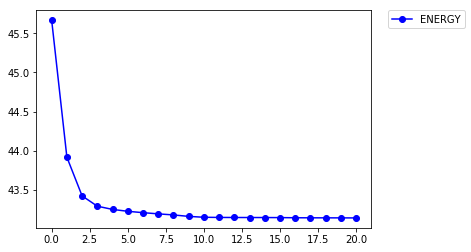

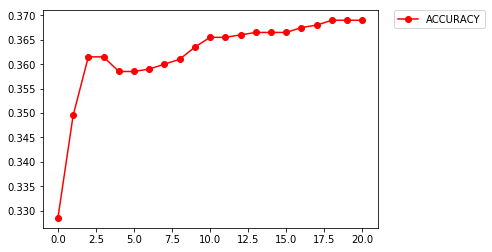

------------------------------------------------------------
K = 10:
Initial Centroids with K=10


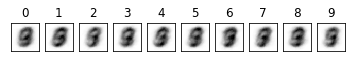

Final Centroids with K=10


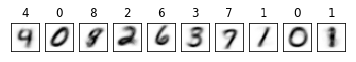

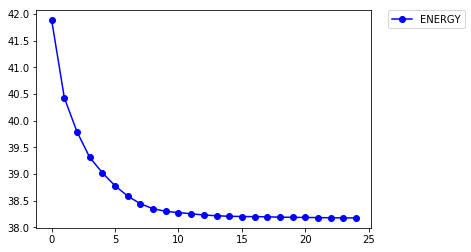

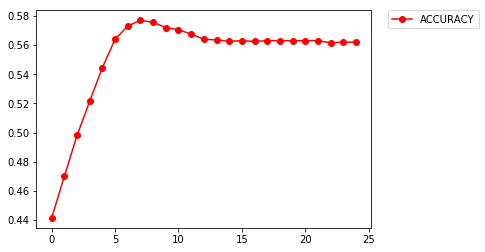

------------------------------------------------------------
K = 15:
Initial Centroids with K=15


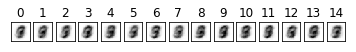

Final Centroids with K=15


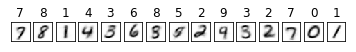

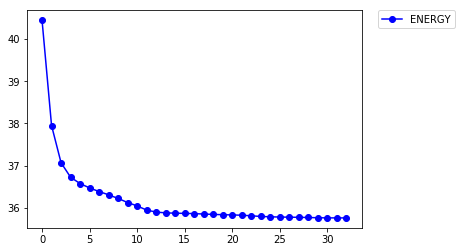

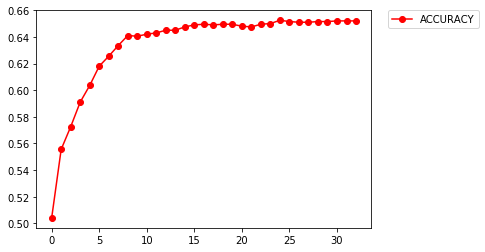

------------------------------------------------------------
K = 20:
Initial Centroids with K=20


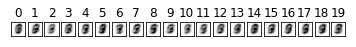

Final Centroids with K=20


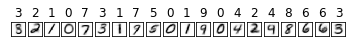

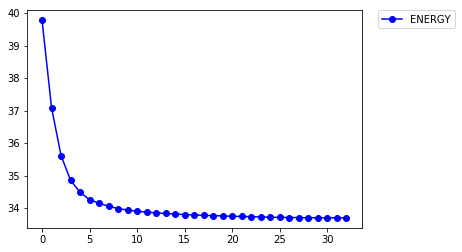

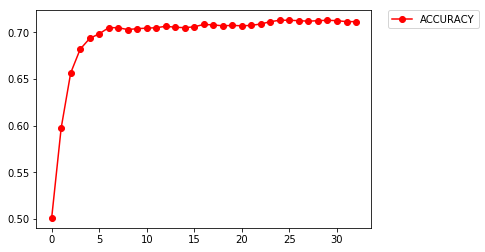

In [17]:
 for k in range(5, 21, 5):    
        print("------------------------------------------------------------")        
        print(f"K = {k}:")    
        
        # initialize labels and centroids    
        
        init_labels = initialiseLabel(num_image, k)    
        init_centroids = computeCentroid(list_image, init_labels, k)   
        
        
        # execute clustering    
        
        result = cluster(k, list_image, init_labels)    
        prev_centroids = result['prev_centroids']    
        energies = result['energies']    
        prev_labels = result['prev_labels']    
        accuracies = result['accuracies']    
        frequent_labels = result['frequent_labels']    
        
        # plot images and energy graph    
        plotCentroids(k, init_centroids, frequent_labels)    
        plotCentroids(k, prev_centroids, frequent_labels)    
        plotEnergies(energies)    
        plotAccuracies(accuracies)


# Read the Data and Data Processing
## - test data set

In [18]:
file_data   = "./mnist_test.csv" 
handle_file = open(file_data, "r") 
data        = handle_file.readlines() 
handle_file.close() 

size_row    = 28    # height of the image 
size_col    = 28    # width of the image 

num_image   = len(data) # original data length 
#num_image = 2000    # data length for debugging 
count       = 0     # count for the number of images


# Image vectors and label list

In [19]:
#
# make a matrix each column of which represents an images in a vector form 
# 
list_image  = np.empty((size_row * size_col, num_image), dtype=float) # represents each image in ve ctor form 
list_label  = np.empty(num_image, dtype=int) #for line in data: # original loop 

for line in data:    
    
    line_data   = line.split(',')    
    label       = line_data[0]    
    im_vector   = np.asfarray(line_data[1:])    
    im_vector   = normalize(im_vector)    
    
    list_label[count]       = label    
    list_image[:, count]    = im_vector        
    
    count += 1

In [26]:
img_char = list_image.shape[0] # the number of row of list_image vector: 784 
cnum = list_image.shape[1] # the number of column number of list_image vector: 10000

In [27]:
print(img_char)

784


# Execution K-means algorithm

------------------------------------------------------------
K = 5:
Initial Centroids with K=5


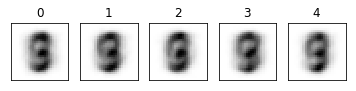

Final Centroids with K=5


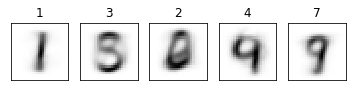

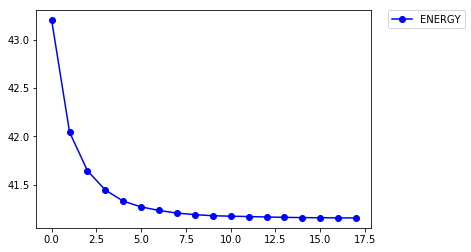

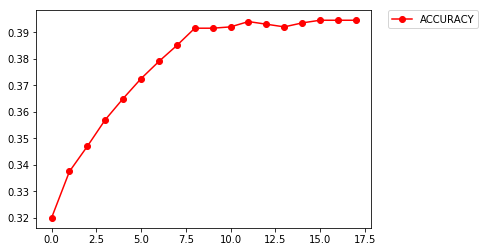

------------------------------------------------------------
K = 10:
Initial Centroids with K=10


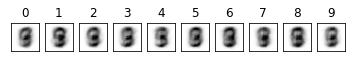

Final Centroids with K=10


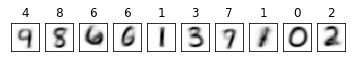

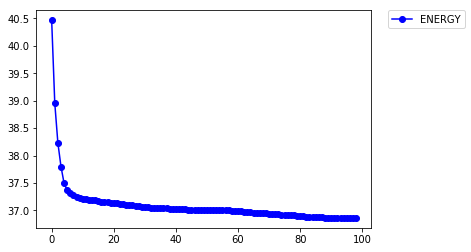

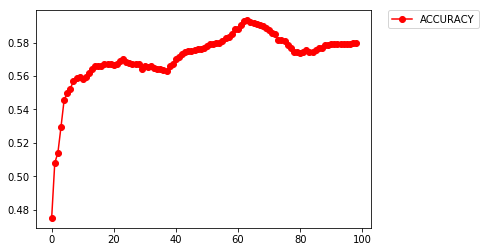

------------------------------------------------------------
K = 15:
Initial Centroids with K=15


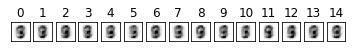

Final Centroids with K=15


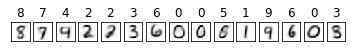

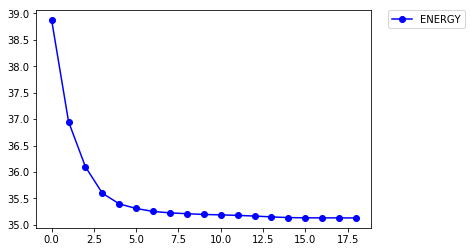

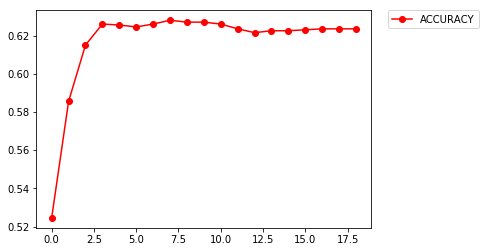

------------------------------------------------------------
K = 20:
Initial Centroids with K=20


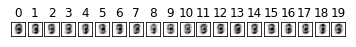

Final Centroids with K=20


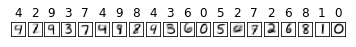

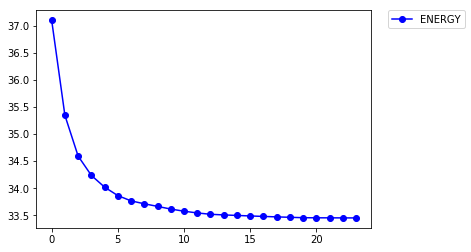

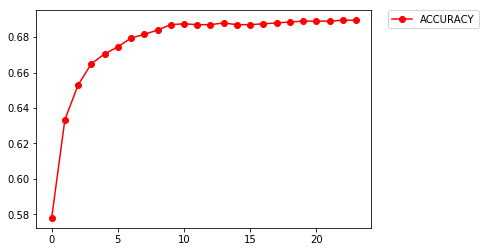

In [21]:
 for k in range(5, 21, 5):    
        print("------------------------------------------------------------")        
        print(f"K = {k}:")    
        
        # initialize labels and centroids    
        
        init_labels = initialiseLabel(num_image, k)    
        init_centroids = computeCentroid(list_image, init_labels, k)   
        
        
        # execute clustering    
        
        result = cluster(k, list_image, init_labels)    
        prev_centroids = result['prev_centroids']    
        energies = result['energies']    
        prev_labels = result['prev_labels']    
        accuracies = result['accuracies']    
        frequent_labels = result['frequent_labels']    
        
        # plot images and energy graph    
        plotCentroids(k, init_centroids, frequent_labels)    
        plotCentroids(k, prev_centroids, frequent_labels)    
        plotEnergies(energies)    
        plotAccuracies(accuracies)


In [1]:
num_image

NameError: name 'num_image' is not defined